## Fashion_MNIST data set classification of image with machine learning

In [56]:
#importing necessary libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_project import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from sklearn.svm import SVC

In [57]:
#importing the dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train) , (x_test,y_test) = fashion_mnist.load_data()

print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


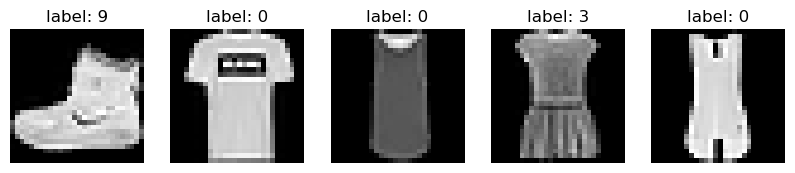

In [58]:
#visualization of 5 sample data point
plt.figure(figsize =(10,5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train [i], cmap = 'gray')
    plt.title(f"label: {y_train[i]}")
    plt.axis('off')
plt.show()

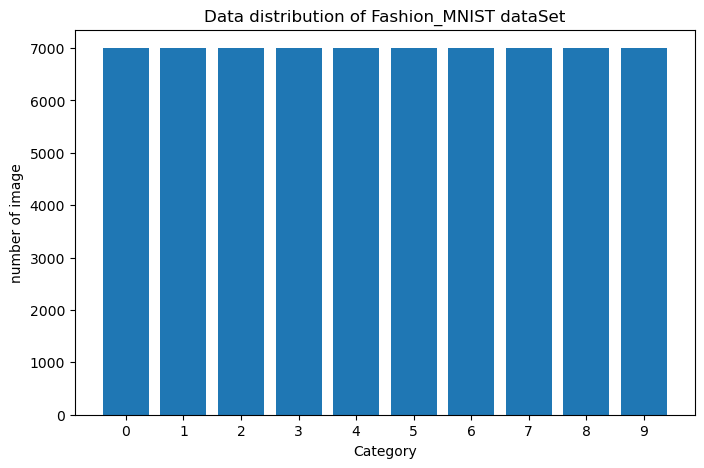

In [59]:
#visualization of data distribution
all_labels = np.concatenate( [y_train,y_test])

unique, counts = np.unique(all_labels, return_counts =True)

plt.figure(figsize =(8,5))
plt.bar(unique, counts, tick_label=unique)
plt.title("Data distribution of Fashion_MNIST dataSet")
plt.xlabel("Category")
plt.ylabel("number of image")
plt.show()

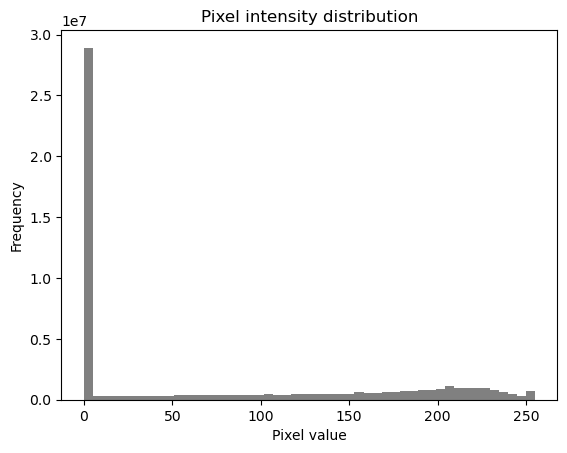

In [60]:
#pixel intensity distribution

all_images = np.concatenate([x_train, x_test], axis =0)
plt.hist(all_images.ravel(), bins = 50 , color = 'gray')
plt.title("Pixel intensity distribution")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

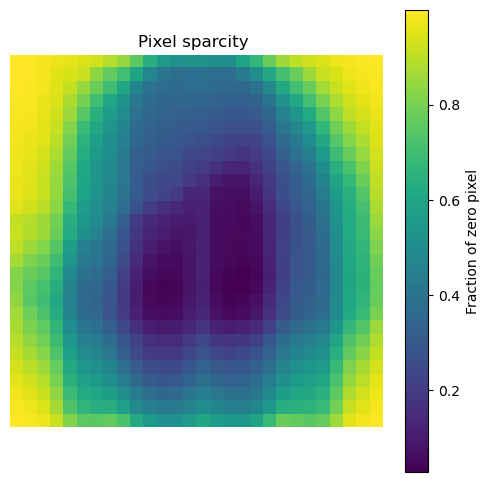

In [61]:
zero_mask = (all_images == 0)
zero_fraction = zero_mask.mean(axis = 0)

plt.figure(figsize=(6,6))
plt.imshow(zero_fraction, cmap ='viridis')
plt.colorbar(label ='Fraction of zero pixel')
plt.title("Pixel sparcity ")
plt.axis('off')
plt.show()

In [62]:
#Data preparation for analysis
#Flating each 28*28 image into a 784-length metrics
x_train_flat = x_train.reshape (x_train.shape[0], -1)
x_test_flat = x_test.reshape (x_test.shape [0], -1)

#Normalizing the pixel value to 0-1 range
x_train_flat = x_train_flat.astype ('float32')/ 255.0
x_test_flat = x_test_flat.astype ('float32') / 255.0



Pixel matrix for a sample image:
    0   1   2   3    4    5    6    7    8    9   ...   18   19   20   21  \
0    0   0   0   0    1    0    0    0    0   22  ...    9    0    0    0   
1    0   0   0   1    0    0   20  131  199  206  ...  206  188  126   17   
2    0   0   0   1    0   35  214  191  183  178  ...  183  189  195  185   
3    0   0   0   0    0  170  190  172  177  176  ...  175  175  177  183   
4    0   0   0   0   25  194  180  178  174  184  ...  193  190  178  175   
5    0   0   0   0   42  218  191  197  208  204  ...  214  211  211  191   
6    0   0   0   0   88  221  215  217  219  211  ...  135  212  203  207   
7    0   0   0   0    0   27  118  162   40    0  ...    0    0  203  230   
8    0   0   0   0  138  136   71   69   54  216  ...  221  186   38   26   
9    0   0   0   0   67  134  154  224  129   66  ...   86   73  157  151   
10   0   0   0   0  203  198  172  183  206  255  ...  255  238  184  160   
11   0   0   0   0  122  188  224  151  105

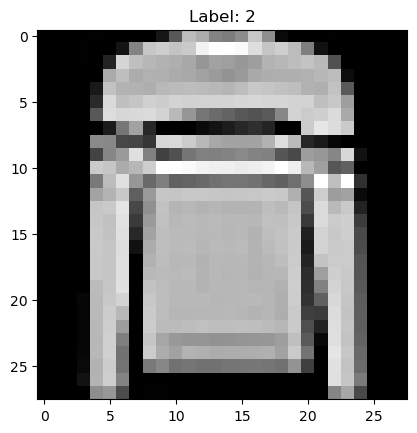

In [63]:
#Displaying the pixel matrix of a sample image
image = x_train[5]

df = pd.DataFrame(image)
print("Pixel matrix for a sample image:")
print(df)

#optimally visualizing the image

plt.imshow(image, cmap = 'gray')
plt.title ( f"Label: {y_train[5]}")
plt.show()

In [64]:
# Using 'saga' solver for large datasets and multinomial classification
model_reg = LogisticRegression(
    solver = 'saga',
    max_iter = 3000,
    tol = 0.01,
    verbose = 1,
    n_jobs = 1,
    warm_start = True  
)

model_reg.fit(x_train_flat , y_train)

convergence after 37 epochs took 109 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


,penalty,'l2'
,dual,False
,tol,0.01
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,3000
,multi_class,'deprecated'


In [65]:
#calculating accuracy for regression model
accuracy = model_reg.score(x_test_flat, y_test)
print(f"Test accuracy: {accuracy:4f}")

y_pred = model_reg.predict(x_test_flat)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:", cm)

print("\nClassification Report:", classification_report(y_test,y_pred))

Test accuracy: 0.844900
Confusion matrix: [[806   2  12  52   5   3 110   0  10   0]
 [  4 956   4  26   5   0   3   0   2   0]
 [ 24   3 737  12 124   1  85   1  13   0]
 [ 28  14  17 869  26   0  39   0   7   0]
 [  0   1 113  37 760   0  81   0   8   0]
 [  1   0   0   1   0 926   0  48   4  20]
 [139   2 123  40 103   0 571   0  22   0]
 [  0   0   0   0   0  29   0 943   0  28]
 [  6   1   8  11   3   5  22   6 938   0]
 [  0   1   0   0   0  15   1  40   0 943]]

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.93      0.94      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8    

In [66]:
#fitting svc model
model_svc = SVC(kernel='rbf')
model_svc.fit(x_train_flat, y_train)
print("Test accuracy:", model_svc.score(x_test_flat, y_test))

Test accuracy: 0.8829


In [67]:
#calculating accuracy for svc model
y_pred = model_svc.predict(x_test_flat)

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:", cm)

print("\nClassification Report:", classification_report(y_test,y_pred))

Confusion matrix: [[857   0  16  28   3   2  85   0   9   0]
 [  4 962   2  25   3   0   4   0   0   0]
 [ 11   2 816  16  88   0  65   0   2   0]
 [ 27   3  11 890  33   0  32   0   4   0]
 [  1   1  87  32 815   0  61   0   3   0]
 [  0   0   0   1   0 951   0  33   1  14]
 [135   1 103  27  68   0 655   0  11   0]
 [  0   0   0   0   0  21   0 955   0  24]
 [  3   1   1   5   2   2   4   5 977   0]
 [  0   0   0   0   0  11   1  37   0 951]]

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0

In [68]:
#Data preparation for cnn model
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [69]:
# fitting cnn model

model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


D:\introduction_to_python\.pixi\envs\default\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.8404 - loss: 0.4399 - val_accuracy: 0.8752 - val_loss: 0.3448
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8928 - loss: 0.2937 - val_accuracy: 0.8962 - val_loss: 0.2924
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9077 - loss: 0.2487 - val_accuracy: 0.9001 - val_loss: 0.2734
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9192 - loss: 0.2157 - val_accuracy: 0.9039 - val_loss: 0.2665
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9282 - loss: 0.1926 - val_accuracy: 0.9079 - val_loss: 0.2579


In [54]:
#Calculating accuracy for cnn model
test_loss, test_acc = model_cnn.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.9055
